### Introduction :

Ce notebook analyse les données des chaînes YouTube populaires dans le domaine scientifique. En exploitant l'API YouTube, nous collectons des informations sur les abonnés, les vues totales, le nombre de vidéos publiées et les performances des vidéos individuelles. Nous visualisons ensuite ces données pour obtenir des insights sur les performances des chaînes et des vidéos.

In [1]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
# Chargement des variables d'environnement
cle_api = 'API_Key'

In [3]:
# Définition des identifiants des chaines
id_chaine = 'UCwI-JbGNsojunnHbFAc0M4Q' #Arte
id_chaine_list = [
    'UCaNlbnghtwlsGF-KzAFThqA',  # ScienceEtonnante
    'UCcziTK2NKeWtWQ6kB5tmQ8Q',  # E-penser
    'UCeR8BYZS7IHYjk_9Mh5JgkA',  # Scilabus
    'UC7sXGI8p8PvKosLWagkK9wQ',  # Heu7reka
    'UC5X4e8ScZI2AFd_vkjSoyoQ',  # AstronoGeek
    'UCtqICqGbPSbTN09K1_7VZ3Q'   # Dirtybiology
]

In [4]:
# Connexion à l'API YouTube
youtube = build('youtube', 'v3', developerKey=cle_api)

##### Récupère les statistiques d'une chaîne YouTube spécifique.

In [5]:
def obtenir_stats_chaine(youtube, id_chaine):
    requete = youtube.channels().list(
        part='snippet,contentDetails,statistics',
        id=id_chaine
    )
    reponse = requete.execute()
    data = {
        'nom_chaine': reponse['items'][0]['snippet']['title'],
        'abonnés': int(reponse['items'][0]['statistics']['subscriberCount']),
        'vues': int(reponse['items'][0]['statistics']['viewCount']),
        'total_videos': int(reponse['items'][0]['statistics']['videoCount'])
    }
    return data

In [6]:
obtenir_stats_chaine(youtube, id_chaine)

{'nom_chaine': 'ARTE',
 'abonnés': 3900000,
 'vues': 331767590,
 'total_videos': 2384}

##### Récupère les statistiques de plusieurs chaînes YouTube.

In [7]:
def obtenir_stats_chaines(youtube, id_chaines):
    all_data = []
    requete = youtube.channels().list(
        part='snippet,contentDetails,statistics',
        id=','.join(id_chaines)
    )
    reponse = requete.execute()
    for item in reponse['items']:
        donnees = {
            'nom_chaine': item['snippet']['title'],
            'abonnés': int(item['statistics']['subscriberCount']),
            'vues': int(item['statistics']['viewCount']),
            'total_videos': int(item['statistics']['videoCount']),
            'id_playlist': item['contentDetails']['relatedPlaylists']['uploads']
        }
        all_data.append(donnees)
    return all_data

In [8]:
# Récupérer les statistiques des chaînes
statistiques_chaines = obtenir_stats_chaines(youtube, id_chaine_list)
statistiques_chaines

[{'nom_chaine': 'e-penser 2.0',
  'abonnés': 1140000,
  'vues': 123952126,
  'total_videos': 175,
  'id_playlist': 'UUcziTK2NKeWtWQ6kB5tmQ8Q'},
 {'nom_chaine': 'DirtyBiology',
  'abonnés': 1150000,
  'vues': 104292060,
  'total_videos': 141,
  'id_playlist': 'UUtqICqGbPSbTN09K1_7VZ3Q'},
 {'nom_chaine': 'Scilabus',
  'abonnés': 545000,
  'vues': 53422888,
  'total_videos': 239,
  'id_playlist': 'UUeR8BYZS7IHYjk_9Mh5JgkA'},
 {'nom_chaine': 'ScienceEtonnante',
  'abonnés': 1430000,
  'vues': 125208434,
  'total_videos': 143,
  'id_playlist': 'UUaNlbnghtwlsGF-KzAFThqA'},
 {'nom_chaine': 'Heu?reka',
  'abonnés': 418000,
  'vues': 22750110,
  'total_videos': 127,
  'id_playlist': 'UU7sXGI8p8PvKosLWagkK9wQ'},
 {'nom_chaine': 'AstronoGeek',
  'abonnés': 917000,
  'vues': 173397547,
  'total_videos': 458,
  'id_playlist': 'UU5X4e8ScZI2AFd_vkjSoyoQ'}]

In [9]:
# Création du DataFrame
data_chaines = pd.DataFrame(statistiques_chaines)
data_chaines['abonnés'] = pd.to_numeric(data_chaines['abonnés'])
data_chaines['vues'] = pd.to_numeric(data_chaines['vues'])
data_chaines['total_videos'] = pd.to_numeric(data_chaines['total_videos'])

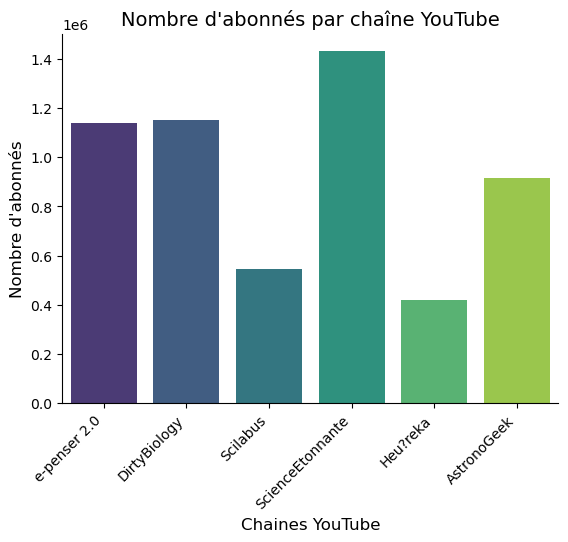

In [10]:
# Visualisation du nombre d'abonnés
ax = sns.barplot(x='nom_chaine', y='abonnés', data=data_chaines, palette='viridis')
ax.set_title("Nombre d'abonnés par chaîne YouTube", fontsize=14)
ax.set_xlabel("Chaines YouTube", fontsize=12)
ax.set_ylabel("Nombre d'abonnés", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotation et alignement des étiquettes
sns.despine()

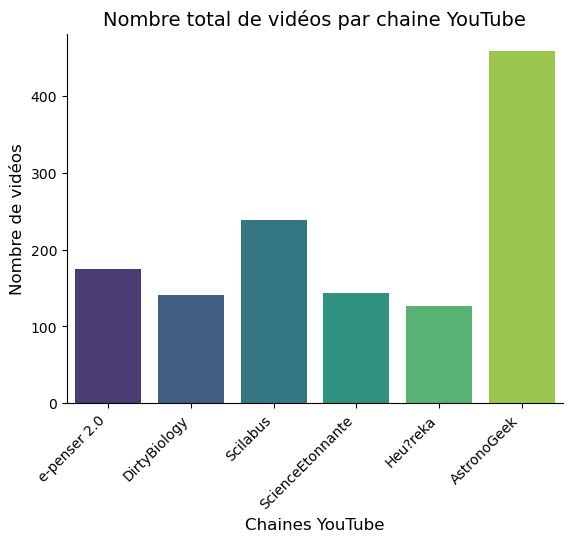

In [11]:
# Visualisation du nombre de vidéos
ax = sns.barplot(x='nom_chaine', y='total_videos', data=data_chaines, palette='viridis')
ax.set_title("Nombre total de vidéos par chaine YouTube", fontsize=14)
ax.set_xlabel("Chaines YouTube", fontsize=12)
ax.set_ylabel("Nombre de vidéos", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
sns.despine()

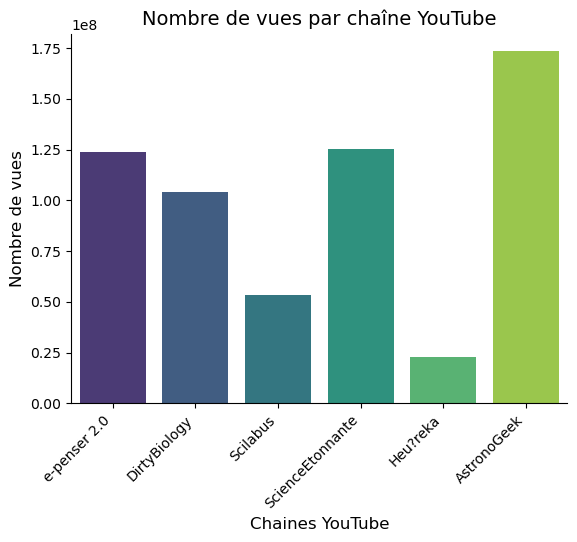

In [12]:
# Visualisation des vues
ax = sns.barplot(x='nom_chaine', y='vues', data=data_chaines, palette='viridis')
ax.set_title("Nombre de vues par chaîne YouTube", fontsize=14)
ax.set_xlabel("Chaines YouTube", fontsize=12)
ax.set_ylabel("Nombre de vues", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
sns.despine()

In [13]:
# Récupérer l'ID de la playlist d'une chaîne spécifique (ex: Scilabus)
id_playlist = data_chaines.loc[data_chaines['nom_chaine'] == 'Scilabus', 'id_playlist'].iloc[0]

##### Récupère les IDs des vidéos d'une playlist YouTube.

In [14]:
def obtenir_ids_videos(youtube, id_playlist):   
    requete = youtube.playlistItems().list(
        part='contentDetails',
        playlistId=id_playlist,
        maxResults=50
    )
    reponse = requete.execute()
    ids_videos = [item['contentDetails']['videoId'] for item in reponse['items']]
    page_suivante = reponse.get('nextPageToken')
    while page_suivante:
        requete = youtube.playlistItems().list(
            part='contentDetails',
            playlistId=id_playlist,
            maxResults=50,
            pageToken=page_suivante
        )
        reponse = requete.execute()
        ids_videos.extend([item['contentDetails']['videoId'] for item in reponse['items']])
        page_suivante = reponse.get('nextPageToken')
    return ids_videos

In [15]:
# Obtenir les IDs des vidéos
ids_videos = obtenir_ids_videos(youtube, id_playlist)

##### Récupère les détails des vidéos (titre, vues, likes, commentaires).

In [16]:
def obtenir_details_videos(youtube, ids_videos):
   
    stats_videos = []
    for i in range(0, len(ids_videos), 50):
        requete = youtube.videos().list(
            part='snippet,statistics',
            id=','.join(ids_videos[i:i+50])
        )
        reponse = requete.execute()
        for video in reponse['items']:
            details_video = {
                'Titre': video['snippet']['title'],
                'Date_publication': video['snippet']['publishedAt'],
                'Vues': int(video['statistics']['viewCount']),
                'Likes': int(video['statistics']['likeCount']),
                'Commentaires': int(video['statistics']['commentCount'])
            }
            stats_videos.append(details_video)
    return stats_videos

In [17]:
# Obtenir les détails des vidéos
details_videos = obtenir_details_videos(youtube, ids_videos)

In [18]:
# Création du DataFrame des vidéos
donnees_videos = pd.DataFrame(details_videos)
donnees_videos['Date_publication'] = pd.to_datetime(donnees_videos['Date_publication']).dt.date
donnees_videos['Vues'] = pd.to_numeric(donnees_videos['Vues'])
donnees_videos['Likes'] = pd.to_numeric(donnees_videos['Likes'])
donnees_videos['Commentaires'] = pd.to_numeric(donnees_videos['Commentaires'])

C:\Users\Nouhaila Chg\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 129531 (\N{ROLL OF PAPER}) missing from current font.
  func(*args, **kwargs)
C:\Users\Nouhaila Chg\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 129397 (\N{OVERHEATED FACE}) missing from current font.
  func(*args, **kwargs)
C:\Users\Nouhaila Chg\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129531 (\N{ROLL OF PAPER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Nouhaila Chg\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129397 (\N{OVERHEATED FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


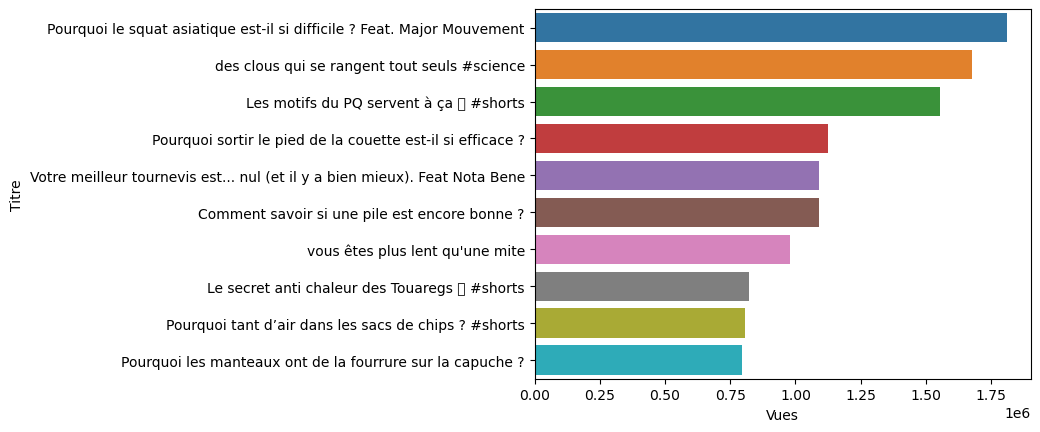

In [19]:
# Top 10 des vidéos par vues
top_10_videos = donnees_videos.sort_values(by='Vues', ascending=False).head(10)
ax1 = sns.barplot(x='Vues', y='Titre', data=top_10_videos)

In [20]:
# Ajouter une colonne pour le mois de publication
donnees_videos['Mois'] = pd.to_datetime(donnees_videos['Date_publication']).dt.strftime('%b')

In [21]:
# Nombre de vidéos par mois
videos_par_mois = donnees_videos.groupby('Mois', as_index=False).size()
ordre_mois = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
videos_par_mois.index = pd.CategoricalIndex(videos_par_mois['Mois'], categories=ordre_mois, ordered=True)

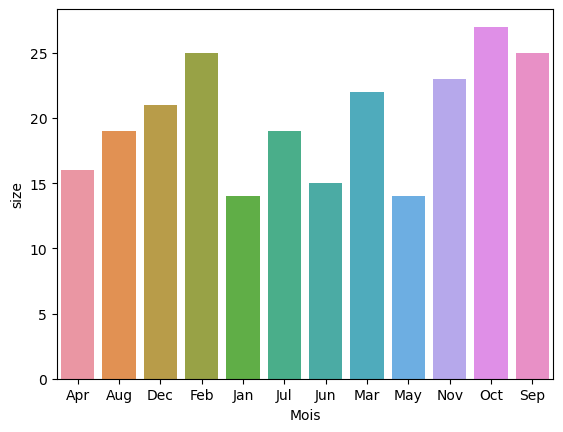

In [22]:
# Visualisation des vidéos par mois
ax2 = sns.barplot(x='Mois', y='size', data=videos_par_mois)

C:\Users\Nouhaila Chg\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 129531 (\N{ROLL OF PAPER}) missing from current font.
  func(*args, **kwargs)
C:\Users\Nouhaila Chg\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 129397 (\N{OVERHEATED FACE}) missing from current font.
  func(*args, **kwargs)
C:\Users\Nouhaila Chg\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129531 (\N{ROLL OF PAPER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Nouhaila Chg\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129397 (\N{OVERHEATED FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


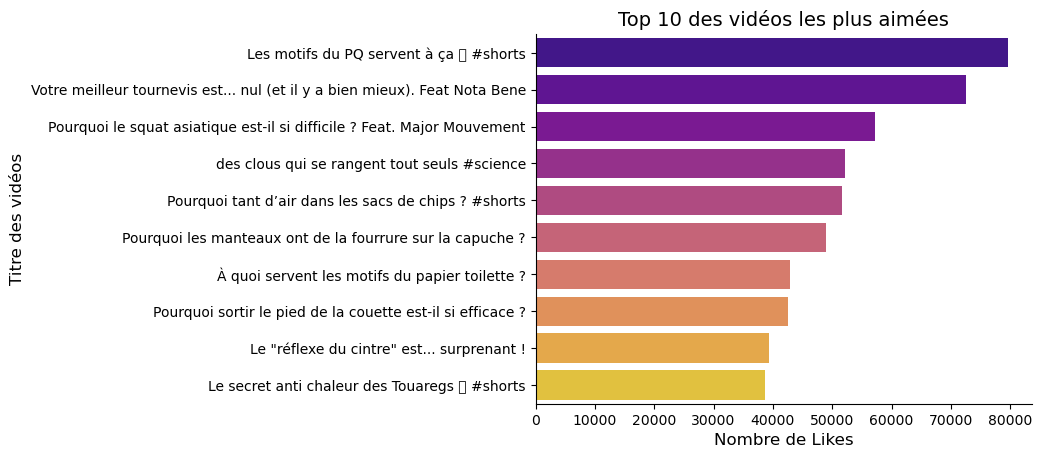

In [23]:
# Analyser les 10 vidéos les plus aimées
top10_videos_aimées = donnees_videos.sort_values(by='Likes', ascending=False).head(10)

# Visualisation des vidéos les plus aimées
ax3 = sns.barplot(x='Likes', y='Titre', data=top10_videos_aimées, palette='plasma')
ax3.set_title("Top 10 des vidéos les plus aimées", fontsize=14)
ax3.set_xlabel("Nombre de Likes", fontsize=12)
ax3.set_ylabel("Titre des vidéos", fontsize=12)
sns.despine()

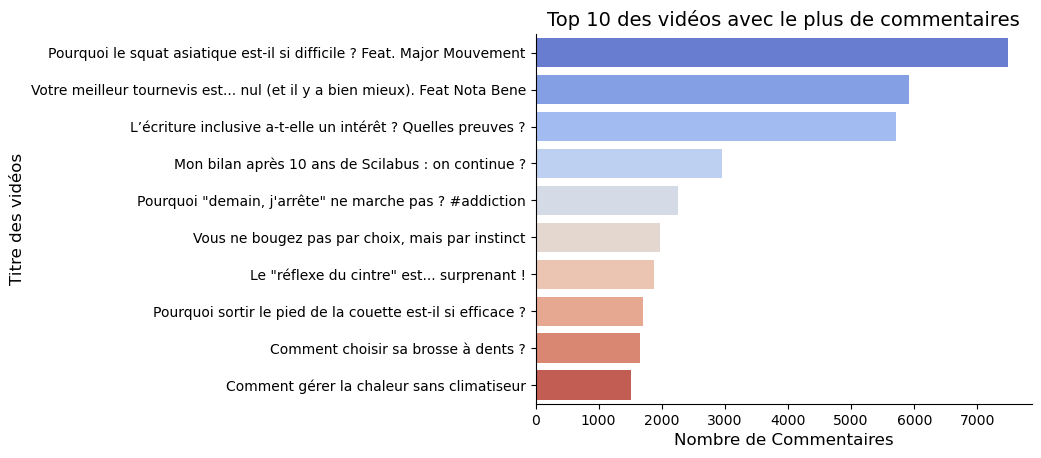

In [24]:
# Analyser les 10 vidéos avec le plus de commentaires
top10_videos_commentaires = donnees_videos.sort_values(by='Commentaires', ascending=False).head(10)

# Visualisation des vidéos avec le plus de commentaires
ax4 = sns.barplot(x='Commentaires', y='Titre', data=top10_videos_commentaires, palette='coolwarm')
ax4.set_title("Top 10 des vidéos avec le plus de commentaires", fontsize=14)
ax4.set_xlabel("Nombre de Commentaires", fontsize=12)
ax4.set_ylabel("Titre des vidéos", fontsize=12)
sns.despine()

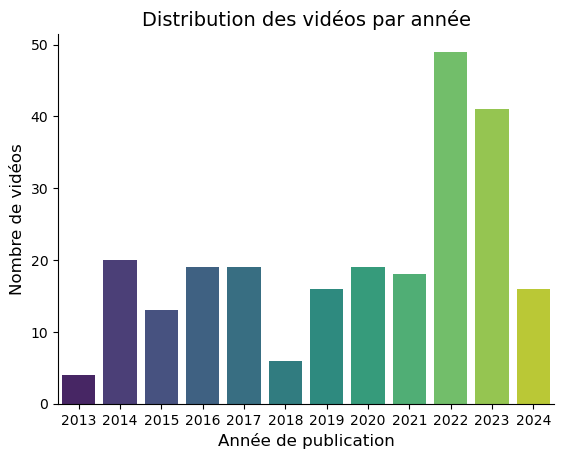

In [25]:
# Extraire l'année de publication
donnees_videos['Année'] = pd.to_datetime(donnees_videos['Date_publication']).dt.year

# Analyser la distribution des vidéos par année
distribution_années = donnees_videos['Année'].value_counts().sort_index()

# Visualisation de la distribution des vidéos par année
ax6 = sns.barplot(x=distribution_années.index, y=distribution_années.values, palette='viridis')
ax6.set_title("Distribution des vidéos par année", fontsize=14)
ax6.set_xlabel("Année de publication", fontsize=12)
ax6.set_ylabel("Nombre de vidéos", fontsize=12)
sns.despine()

Le graphique montre une augmentation significative du nombre de vidéos publiées en 2022, suivie d'une légère baisse en 2024. Les années précédentes ont été marquées par une production plus stable.

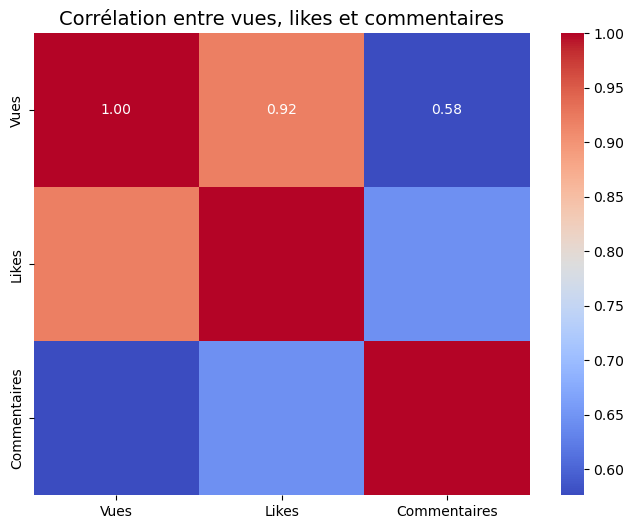

In [26]:
# Corrélation entre vues, likes et commentaires
plt.figure(figsize=(8, 6))
sns.heatmap(donnees_videos[['Vues', 'Likes', 'Commentaires']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Corrélation entre vues, likes et commentaires", fontsize=14)
plt.show()

La matrice de corrélation montre un lien très fort entre le nombre de vues et le nombre de likes d'une vidéo. Il existe également un lien plus faible, mais toujours positif, entre les vues et les commentaires, ainsi qu'entre les likes et les commentaires.

En d'autres termes, plus une vidéo est vue, plus elle a de chances d'être aimée et commentée.

Cela souligne l'importance de l'engagement des utilisateurs (likes et commentaires) pour le succès d'une vidéo.

In [27]:
# Sauvegarder les détails des vidéos dans un fichier CSV
donnees_videos.to_csv('Détails_Vidéos_Scilabus.csv', encoding='utf-8-sig', index=False)